In [9]:
import os
import pandas as pd
from pathlib import Path
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
import math
import plotly.express as px
from sklearn.linear_model import LogisticRegression
import tensorflow as tf
from sklearn.cluster import KMeans
import numpy as np

In [10]:
IMbd_ratings_df = pd.read_csv(r"C:/Users/AYOOLA5/Desktop/University of Toronto/GROUP PROJECT/GROUP_PROJECT/PROJECT DATA ANALYTICS/IMDb_ratings.csv")
IMbd_ratings_df 

,imdb_title_id,weighted_average_vote,total_votes,mean_vote,median_vote,votes_10,votes_9,votes_8,votes_7,votes_6,...,females_30age_avg_vote,females_30age_votes,females_45age_avg_vote,females_45age_votes,top1000_voters_rating,top1000_voters_votes,us_voters_rating,us_voters_votes,non_us_voters_rating,non_us_voters_votes
0,tt0000009,5.9,154,5.9,6.0,12,4,10,43,28,...,5.7,13.0,4.5,4.0,5.7,34.0,6.4,51.0,6.0,70.0
1,tt0000574,6.1,589,6.3,6.0,57,18,58,137,139,...,6.2,23.0,6.6,14.0,6.4,66.0,6.0,96.0,6.2,331.0
2,tt0001892,5.8,188,6.0,6.0,6,6,17,44,52,...,5.8,4.0,6.8,7.0,5.4,32.0,6.2,31.0,5.9,123.0
3,tt0002101,5.2,446,5.3,5.0,15,8,16,62,98,...,5.5,14.0,6.1,21.0,4.9,57.0,5.5,207.0,4.7,105.0
4,tt0002130,7.0,2237,6.9,7.0,210,225,436,641,344,...,7.3,82.0,7.4,77.0,6.9,139.0,7.0,488.0,7.0,1166.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
85850,tt9908390,5.3,398,5.5,6.0,13,9,26,65,104,...,5.7,11.0,5.0,2.0,5.5,12.0,6.3,22.0,5.3,214.0
85851,tt9911196,7.7,724,7.9,8.0,65,139,288,170,42,...,8.0,47.0,7.3,30.0,7.0,6.0,6.8,13.0,7.7,388.0
85852,tt9911774,7.9,265,7.8,8.0,63,29,61,61,31,...,NaN,NaN,NaN,NaN,1.0,1.0,NaN,NaN,2.0,2.0
85853,tt9914286,6.4,194,9.4,10.0,176,0,2,2,1,...,NaN,NaN,7.0,1.0,4.0,3.0,1.7,5.0,5.8,5.0


In [11]:
import pandas as pd
movies1_df = pd.read_csv(r"C:/Users/AYOOLA5/Desktop/University of Toronto/GROUP PROJECT/GROUP_PROJECT/PROJECT DATA ANALYTICS/IMDb_movies1.csv")
movies1_df

,imdb_title_id,genre1,duration,country,language 1,avg_vote,votes,budget,reviews_from_users,reviews_from_critics
0,tt0000009,Romance,45,USA,None,5.9,154,NaN,1.0,2.0
1,tt0000574,Biography,70,Australia,None,6.1,589,"$2,250",7.0,7.0
2,tt0001892,Drama,53,USA,English,5.8,188,NaN,5.0,2.0
3,tt0002101,Adventure,100,Italy,Italian,5.2,446,"$45,000",25.0,3.0
4,tt0002130,Biography,68,USA,English,7.0,2237,NaN,31.0,14.0
...,...,...,...,...,...,...,...,...,...,...
85850,tt9908390,NaN,95,NaN,NaN,5.3,398,NaN,NaN,4.0
85851,tt9911196,NaN,103,NaN,NaN,7.7,724,NaN,6.0,4.0
85852,tt9911774,NaN,130,NaN,NaN,7.9,265,NaN,NaN,NaN
85853,tt9914286,NaN,98,NaN,NaN,6.4,194,NaN,NaN,NaN


In [12]:
#Selecting relevant data from IMDb_ratings
clean_ratings_df = IMbd_ratings_df[["imdb_title_id",
                             "weighted_average_vote",
                             "total_votes",
                             "allgenders_0age_votes",
                             "allgenders_18age_votes",
                             "allgenders_30age_votes",
                             "allgenders_45age_votes",
                             "males_allages_votes",
                             "females_allages_votes"]]
clean_ratings_df.head()

,imdb_title_id,weighted_average_vote,total_votes,allgenders_0age_votes,allgenders_18age_votes,allgenders_30age_votes,allgenders_45age_votes,males_allages_votes,females_allages_votes
0,tt0000009,5.9,154,4.0,38.0,50.0,35.0,97.0,35.0
1,tt0000574,6.1,589,1.0,114.0,239.0,115.0,425.0,50.0
2,tt0001892,5.8,188,NaN,25.0,72.0,62.0,146.0,15.0
3,tt0002101,5.2,446,NaN,23.0,111.0,193.0,299.0,39.0
4,tt0002130,7.0,2237,4.0,402.0,895.0,482.0,1607.0,215.0


In [13]:
#renaming headers in ratings data to avoid confusion
new_names = {"allgenders_0age_votes":"tot_voters_below_18",
            "allgenders_18age_votes":"tot_voters_below_30",
            "allgenders_30age_votes":"tot_voters_below_45",
            "allgenders_45age_votes" : "tot_voters_above_45",
            "males_allages_votes":"tot_male_voters",
             "females_allages_votes": "tot_female_voters"}
ratings_df = clean_ratings_df.rename(columns=new_names)
ratings_df.head(5)

,imdb_title_id,weighted_average_vote,total_votes,tot_voters_below_18,tot_voters_below_30,tot_voters_below_45,tot_voters_above_45,tot_male_voters,tot_female_voters
0,tt0000009,5.9,154,4.0,38.0,50.0,35.0,97.0,35.0
1,tt0000574,6.1,589,1.0,114.0,239.0,115.0,425.0,50.0
2,tt0001892,5.8,188,NaN,25.0,72.0,62.0,146.0,15.0
3,tt0002101,5.2,446,NaN,23.0,111.0,193.0,299.0,39.0
4,tt0002130,7.0,2237,4.0,402.0,895.0,482.0,1607.0,215.0


In [14]:
imdb_data_df = pd.merge(movies1_df,ratings_df, on="imdb_title_id", how="outer")
imdb_data_df

,imdb_title_id,genre1,duration,country,language 1,avg_vote,votes,budget,reviews_from_users,reviews_from_critics,weighted_average_vote,total_votes,tot_voters_below_18,tot_voters_below_30,tot_voters_below_45,tot_voters_above_45,tot_male_voters,tot_female_voters
0,tt0000009,Romance,45,USA,None,5.9,154,NaN,1.0,2.0,5.9,154,4.0,38.0,50.0,35.0,97.0,35.0
1,tt0000574,Biography,70,Australia,None,6.1,589,"$2,250",7.0,7.0,6.1,589,1.0,114.0,239.0,115.0,425.0,50.0
2,tt0001892,Drama,53,USA,English,5.8,188,NaN,5.0,2.0,5.8,188,NaN,25.0,72.0,62.0,146.0,15.0
3,tt0002101,Adventure,100,Italy,Italian,5.2,446,"$45,000",25.0,3.0,5.2,446,NaN,23.0,111.0,193.0,299.0,39.0
4,tt0002130,Biography,68,USA,English,7.0,2237,NaN,31.0,14.0,7.0,2237,4.0,402.0,895.0,482.0,1607.0,215.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
85850,tt9908390,NaN,95,NaN,NaN,5.3,398,NaN,NaN,4.0,5.3,398,1.0,42.0,137.0,101.0,267.0,26.0
85851,tt9911196,NaN,103,NaN,NaN,7.7,724,NaN,6.0,4.0,7.7,724,NaN,105.0,207.0,194.0,412.0,109.0
85852,tt9911774,NaN,130,NaN,NaN,7.9,265,NaN,NaN,NaN,7.9,265,NaN,1.0,1.0,1.0,4.0,NaN
85853,tt9914286,NaN,98,NaN,NaN,6.4,194,NaN,NaN,NaN,6.4,194,NaN,2.0,5.0,3.0,10.0,2.0


In [15]:
#total null values in each column
imdb_data_df.isnull().sum()

imdb_title_id                0
genre1                    1712
duration                     0
country                   1712
language 1                1712
avg_vote                     0
votes                        0
budget                   62145
reviews_from_users        7597
reviews_from_critics     11797
weighted_average_vote        0
total_votes                  0
tot_voters_below_18      52496
tot_voters_below_30        706
tot_voters_below_45         10
tot_voters_above_45         80
tot_male_voters              1
tot_female_voters           81
dtype: int64

In [16]:
#Combining under 18 and under 30 columns to reduce null values in tot_voters_below_18 column
below_18 = imdb_data_df["tot_voters_below_18"]
below_30 = imdb_data_df["tot_voters_below_30"]

combined = []

#Initiating for loop to add values in below 18 and below 30 columns 
#Appending it to combined list to replace both columns by combined

for i in range(len(imdb_data_df)):
    if math.isnan(below_18[i]) is True & math.isnan(below_30[i]) is True:
        combined.append(below_18[i] + below_30[i])
        

    elif math.isnan(below_18[i]) is True and math.isnan(below_30[i]) is False:
        combined.append(below_30[i])
            
    elif math.isnan(below_18[i]) == False and math.isnan(below_30[i]) == True:
        combined.append(below_18[i])
            
    else:
        combined.append(0)

In [17]:
# Dropping under 18 columns
imdb_data_df = imdb_data_df.drop("tot_voters_below_18", axis = 1)
# Repacing under 18 and under 30 columns by under 30(combined)
imdb_data_df["tot_voters_below_18"] = combined

In [18]:
#dropping empty values
imdb_data_df = imdb_data_df.dropna()
imdb_data_df 

,imdb_title_id,genre1,duration,country,language 1,avg_vote,votes,budget,reviews_from_users,reviews_from_critics,weighted_average_vote,total_votes,tot_voters_below_30,tot_voters_below_45,tot_voters_above_45,tot_male_voters,tot_female_voters,tot_voters_below_18
1,tt0000574,Biography,70,Australia,None,6.1,589,"$2,250",7.0,7.0,6.1,589,114.0,239.0,115.0,425.0,50.0,0.0
3,tt0002101,Adventure,100,Italy,Italian,5.2,446,"$45,000",25.0,3.0,5.2,446,23.0,111.0,193.0,299.0,39.0,23.0
7,tt0002445,Drama,120,"France, USA",English,6.2,273,ITL 45000,7.0,5.0,6.2,273,34.0,99.0,69.0,191.0,21.0,0.0
8,tt0002452,Drama,120,Denmark,Danish,6.7,198,ROL 400000,4.0,1.0,6.7,198,28.0,104.0,39.0,153.0,19.0,28.0
9,tt0002461,Crime,55,France,French,5.5,225,"$30,000",8.0,1.0,5.5,225,11.0,95.0,72.0,168.0,15.0,11.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
84118,tt8350360,Comedy,106,"Mexico, Chile",Spanish,5.9,53649,"$30,000,000",748.0,229.0,5.9,53649,12616.0,16561.0,3887.0,28834.0,6720.0,0.0
84124,tt8354006,Drama,90,Bangladesh,Bengali,5.9,400,"$1,000,000",19.0,2.0,5.9,400,35.0,112.0,122.0,130.0,153.0,35.0
84129,tt8355636,Action,80,USA,English,6.6,177,UAH 16000000,3.0,1.0,6.6,177,39.0,72.0,14.0,106.0,24.0,39.0
84132,tt8358682,Animation,91,Japan,Japanese,2.9,345,"$20,000,000",18.0,2.0,2.9,345,17.0,74.0,113.0,214.0,16.0,17.0


In [19]:
imdb_data_df = imdb_data_df.sort_values(by="weighted_average_vote",ascending=1)
imdb_data_df

,imdb_title_id,genre1,duration,country,language 1,avg_vote,votes,budget,reviews_from_users,reviews_from_critics,weighted_average_vote,total_votes,tot_voters_below_30,tot_voters_below_45,tot_voters_above_45,tot_male_voters,tot_female_voters,tot_voters_below_18
69012,tt2903902,Animation,84,Japan,Japanese,1.1,145,"$3,500",10.0,2.0,1.1,145,28.0,53.0,31.0,97.0,17.0,28.0
74980,tt4537362,Adventure,95,Germany,German,1.1,417,"$3,500,000",3.0,13.0,1.1,417,107.0,154.0,29.0,282.0,30.0,0.0
80598,tt6459494,Thriller,67,India,Hindi,1.1,517,RUR 35000000,1.0,3.0,1.1,517,136.0,132.0,19.0,305.0,35.0,0.0
58454,tt1470822,Action,194,UK,English,1.2,141,CAD 30000,3.0,16.0,1.2,141,20.0,67.0,33.0,95.0,24.0,20.0
56849,tt1314645,Action,89,South Korea,Korean,1.2,369,"$155,000",11.0,10.0,1.2,369,56.0,162.0,76.0,230.0,62.0,56.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15528,tt0068646,Crime,175,Jamaica,English,9.2,1572674,"$6,000,000",3977.0,253.0,9.2,1572674,312132.0,619447.0,159410.0,1004808.0,151729.0,0.0
79258,tt5980638,Comedy,96,Brazil,Portuguese,9.2,1450,"$90,000",3.0,4.0,9.2,1450,37.0,221.0,22.0,142.0,152.0,37.0
81109,tt6735740,Thriller,100,Belgium,Flemish,9.3,1239,"$3,000,000",17.0,11.0,9.3,1239,46.0,260.0,42.0,196.0,160.0,0.0
28453,tt0111161,Drama,142,Japan,Japanese,9.3,2278845,"$25,000,000",8232.0,164.0,9.3,2278845,489526.0,863727.0,204278.0,1392803.0,274168.0,0.0


In [20]:
Clean_imdb_data_df = imdb_data_df.drop(["imdb_title_id"],1)
Clean_imdb_data_df

,genre1,duration,country,language 1,avg_vote,votes,budget,reviews_from_users,reviews_from_critics,weighted_average_vote,total_votes,tot_voters_below_30,tot_voters_below_45,tot_voters_above_45,tot_male_voters,tot_female_voters,tot_voters_below_18
69012,Animation,84,Japan,Japanese,1.1,145,"$3,500",10.0,2.0,1.1,145,28.0,53.0,31.0,97.0,17.0,28.0
74980,Adventure,95,Germany,German,1.1,417,"$3,500,000",3.0,13.0,1.1,417,107.0,154.0,29.0,282.0,30.0,0.0
80598,Thriller,67,India,Hindi,1.1,517,RUR 35000000,1.0,3.0,1.1,517,136.0,132.0,19.0,305.0,35.0,0.0
58454,Action,194,UK,English,1.2,141,CAD 30000,3.0,16.0,1.2,141,20.0,67.0,33.0,95.0,24.0,20.0
56849,Action,89,South Korea,Korean,1.2,369,"$155,000",11.0,10.0,1.2,369,56.0,162.0,76.0,230.0,62.0,56.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15528,Crime,175,Jamaica,English,9.2,1572674,"$6,000,000",3977.0,253.0,9.2,1572674,312132.0,619447.0,159410.0,1004808.0,151729.0,0.0
79258,Comedy,96,Brazil,Portuguese,9.2,1450,"$90,000",3.0,4.0,9.2,1450,37.0,221.0,22.0,142.0,152.0,37.0
81109,Thriller,100,Belgium,Flemish,9.3,1239,"$3,000,000",17.0,11.0,9.3,1239,46.0,260.0,42.0,196.0,160.0,0.0
28453,Drama,142,Japan,Japanese,9.3,2278845,"$25,000,000",8232.0,164.0,9.3,2278845,489526.0,863727.0,204278.0,1392803.0,274168.0,0.0


In [21]:
Clean_imdb_data_df = imdb_data_df.drop_duplicates()
Clean_imdb_data_df 

,imdb_title_id,genre1,duration,country,language 1,avg_vote,votes,budget,reviews_from_users,reviews_from_critics,weighted_average_vote,total_votes,tot_voters_below_30,tot_voters_below_45,tot_voters_above_45,tot_male_voters,tot_female_voters,tot_voters_below_18
69012,tt2903902,Animation,84,Japan,Japanese,1.1,145,"$3,500",10.0,2.0,1.1,145,28.0,53.0,31.0,97.0,17.0,28.0
74980,tt4537362,Adventure,95,Germany,German,1.1,417,"$3,500,000",3.0,13.0,1.1,417,107.0,154.0,29.0,282.0,30.0,0.0
80598,tt6459494,Thriller,67,India,Hindi,1.1,517,RUR 35000000,1.0,3.0,1.1,517,136.0,132.0,19.0,305.0,35.0,0.0
58454,tt1470822,Action,194,UK,English,1.2,141,CAD 30000,3.0,16.0,1.2,141,20.0,67.0,33.0,95.0,24.0,20.0
56849,tt1314645,Action,89,South Korea,Korean,1.2,369,"$155,000",11.0,10.0,1.2,369,56.0,162.0,76.0,230.0,62.0,56.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15528,tt0068646,Crime,175,Jamaica,English,9.2,1572674,"$6,000,000",3977.0,253.0,9.2,1572674,312132.0,619447.0,159410.0,1004808.0,151729.0,0.0
79258,tt5980638,Comedy,96,Brazil,Portuguese,9.2,1450,"$90,000",3.0,4.0,9.2,1450,37.0,221.0,22.0,142.0,152.0,37.0
81109,tt6735740,Thriller,100,Belgium,Flemish,9.3,1239,"$3,000,000",17.0,11.0,9.3,1239,46.0,260.0,42.0,196.0,160.0,0.0
28453,tt0111161,Drama,142,Japan,Japanese,9.3,2278845,"$25,000,000",8232.0,164.0,9.3,2278845,489526.0,863727.0,204278.0,1392803.0,274168.0,0.0


In [22]:
Clean_imdb_data_df.dtypes

imdb_title_id             object
genre1                    object
duration                   int64
country                   object
language 1                object
avg_vote                 float64
votes                      int64
budget                    object
reviews_from_users       float64
reviews_from_critics     float64
weighted_average_vote    float64
total_votes                int64
tot_voters_below_30      float64
tot_voters_below_45      float64
tot_voters_above_45      float64
tot_male_voters          float64
tot_female_voters        float64
tot_voters_below_18      float64
dtype: object

In [23]:
print(f"Duplicates entries: {Clean_imdb_data_df.duplicated().sum()}")

Duplicates entries: 0


In [24]:
Clean_imdb_data_df1 = imdb_data_df.drop(["imdb_title_id","budget"],1)
Clean_imdb_data_df1

,genre1,duration,country,language 1,avg_vote,votes,reviews_from_users,reviews_from_critics,weighted_average_vote,total_votes,tot_voters_below_30,tot_voters_below_45,tot_voters_above_45,tot_male_voters,tot_female_voters,tot_voters_below_18
69012,Animation,84,Japan,Japanese,1.1,145,10.0,2.0,1.1,145,28.0,53.0,31.0,97.0,17.0,28.0
74980,Adventure,95,Germany,German,1.1,417,3.0,13.0,1.1,417,107.0,154.0,29.0,282.0,30.0,0.0
80598,Thriller,67,India,Hindi,1.1,517,1.0,3.0,1.1,517,136.0,132.0,19.0,305.0,35.0,0.0
58454,Action,194,UK,English,1.2,141,3.0,16.0,1.2,141,20.0,67.0,33.0,95.0,24.0,20.0
56849,Action,89,South Korea,Korean,1.2,369,11.0,10.0,1.2,369,56.0,162.0,76.0,230.0,62.0,56.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15528,Crime,175,Jamaica,English,9.2,1572674,3977.0,253.0,9.2,1572674,312132.0,619447.0,159410.0,1004808.0,151729.0,0.0
79258,Comedy,96,Brazil,Portuguese,9.2,1450,3.0,4.0,9.2,1450,37.0,221.0,22.0,142.0,152.0,37.0
81109,Thriller,100,Belgium,Flemish,9.3,1239,17.0,11.0,9.3,1239,46.0,260.0,42.0,196.0,160.0,0.0
28453,Drama,142,Japan,Japanese,9.3,2278845,8232.0,164.0,9.3,2278845,489526.0,863727.0,204278.0,1392803.0,274168.0,0.0


In [25]:
Clean_imdb_data_df1 = Clean_imdb_data_df1.dropna()
Clean_imdb_data_df1 

,genre1,duration,country,language 1,avg_vote,votes,reviews_from_users,reviews_from_critics,weighted_average_vote,total_votes,tot_voters_below_30,tot_voters_below_45,tot_voters_above_45,tot_male_voters,tot_female_voters,tot_voters_below_18
69012,Animation,84,Japan,Japanese,1.1,145,10.0,2.0,1.1,145,28.0,53.0,31.0,97.0,17.0,28.0
74980,Adventure,95,Germany,German,1.1,417,3.0,13.0,1.1,417,107.0,154.0,29.0,282.0,30.0,0.0
80598,Thriller,67,India,Hindi,1.1,517,1.0,3.0,1.1,517,136.0,132.0,19.0,305.0,35.0,0.0
58454,Action,194,UK,English,1.2,141,3.0,16.0,1.2,141,20.0,67.0,33.0,95.0,24.0,20.0
56849,Action,89,South Korea,Korean,1.2,369,11.0,10.0,1.2,369,56.0,162.0,76.0,230.0,62.0,56.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15528,Crime,175,Jamaica,English,9.2,1572674,3977.0,253.0,9.2,1572674,312132.0,619447.0,159410.0,1004808.0,151729.0,0.0
79258,Comedy,96,Brazil,Portuguese,9.2,1450,3.0,4.0,9.2,1450,37.0,221.0,22.0,142.0,152.0,37.0
81109,Thriller,100,Belgium,Flemish,9.3,1239,17.0,11.0,9.3,1239,46.0,260.0,42.0,196.0,160.0,0.0
28453,Drama,142,Japan,Japanese,9.3,2278845,8232.0,164.0,9.3,2278845,489526.0,863727.0,204278.0,1392803.0,274168.0,0.0


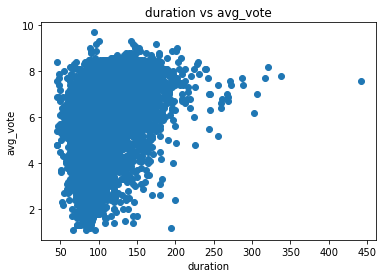

In [26]:
import matplotlib.pyplot as plt
duration = Clean_imdb_data_df1 ['duration'].tolist()
avg_vote = Clean_imdb_data_df1 ['avg_vote'].tolist()
plt.scatter(duration,avg_vote)
plt.title('duration vs avg_vote')
plt.xlabel('duration')
plt.ylabel('avg_vote')
plt.show()

C:\Users\AYOOLA5\anaconda3\envs\mlenv\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 9 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\AYOOLA5\anaconda3\envs\mlenv\lib\site-packages\matplotlib\backends\backend_agg.py:201: RuntimeWarning: Glyph 9 missing from current font.
  font.set_text(s, 0, flags=flags)


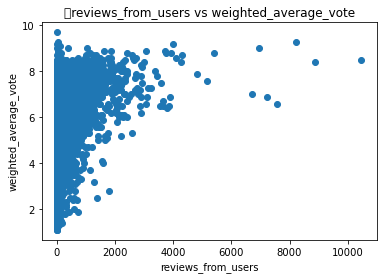

In [27]:
import matplotlib.pyplot as plt
reviews_from_users = Clean_imdb_data_df1 ['reviews_from_users'].tolist()
weighted_average_vote = Clean_imdb_data_df1 ['weighted_average_vote'].tolist()
plt.scatter(reviews_from_users,weighted_average_vote)
plt.title('	reviews_from_users vs weighted_average_vote')
plt.xlabel('reviews_from_users')
plt.ylabel('weighted_average_vote')
plt.show()

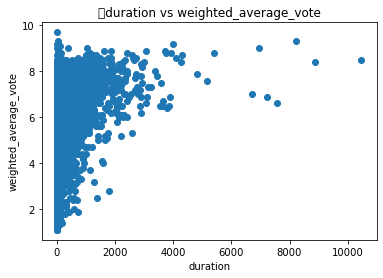

In [28]:
import matplotlib.pyplot as plt
duration = Clean_imdb_data_df1 ['duration'].tolist()
weighted_average_vote = Clean_imdb_data_df1 ['weighted_average_vote'].tolist()
plt.scatter(reviews_from_users,weighted_average_vote)
plt.title('	duration vs weighted_average_vote')
plt.xlabel('duration')
plt.ylabel('weighted_average_vote')
plt.show()

In [29]:
#Preprocessing data Encoding Labels With Pandas
Clean_imdb_data_df1_encoded = pd.get_dummies(Clean_imdb_data_df1, columns=["genre1", "country","language 1"])
Clean_imdb_data_df1_encoded.head()

,duration,avg_vote,votes,reviews_from_users,reviews_from_critics,weighted_average_vote,total_votes,tot_voters_below_30,tot_voters_below_45,tot_voters_above_45,...,language 1_Ukrainian,language 1_Urdu,language 1_Uzbek,language 1_Vietnamese,language 1_Welsh,language 1_Wolof,language 1_Xhosa,language 1_Yiddish,language 1_Yoruba,language 1_Zulu
69012,84,1.1,145,10.0,2.0,1.1,145,28.0,53.0,31.0,...,0,0,0,0,0,0,0,0,0,0
74980,95,1.1,417,3.0,13.0,1.1,417,107.0,154.0,29.0,...,0,0,0,0,0,0,0,0,0,0
80598,67,1.1,517,1.0,3.0,1.1,517,136.0,132.0,19.0,...,0,0,0,0,0,0,0,0,0,0
58454,194,1.2,141,3.0,16.0,1.2,141,20.0,67.0,33.0,...,0,0,0,0,0,0,0,0,0,0
56849,89,1.2,369,11.0,10.0,1.2,369,56.0,162.0,76.0,...,0,0,0,0,0,0,0,0,0,0


In [30]:
#Scaling  and Normalizing Data
from sklearn.preprocessing import StandardScaler
data_scaler = StandardScaler()

In [31]:
Clean_imdb_data_df1_scaled = data_scaler.fit_transform(Clean_imdb_data_df1_encoded)
Clean_imdb_data_df1_scaled

array([[-8.87647969e-01, -3.70804534e+00, -3.20828801e-01, ...,
        -9.79803736e-03, -9.79803736e-03, -9.79803736e-03],
       [-3.59918211e-01, -3.70804534e+00, -3.18224199e-01, ...,
        -9.79803736e-03, -9.79803736e-03, -9.79803736e-03],
       [-1.70323032e+00, -3.70804534e+00, -3.17266624e-01, ...,
        -9.79803736e-03, -9.79803736e-03, -9.79803736e-03],
       ...,
       [-1.20041049e-01,  2.62171555e+00, -3.10352937e-01, ...,
        -9.79803736e-03, -9.79803736e-03, -9.79803736e-03],
       [ 1.89492712e+00,  2.62171555e+00,  2.14994185e+01, ...,
        -9.79803736e-03, -9.79803736e-03, -9.79803736e-03],
       [-4.07893644e-01,  2.93048438e+00, -3.15811111e-01, ...,
        -9.79803736e-03, -9.79803736e-03, -9.79803736e-03]])

In [32]:
import numpy as np
print(np.mean(Clean_imdb_data_df1_scaled[:,0]))
print(np.std(Clean_imdb_data_df1_scaled[:,0]))

2.837396477813311e-16
1.0


In [33]:
Clean_imdb_data_df1_scaled.shape

(20835, 1984)

In [34]:
Clean_imdb_data_df1_encoded['weighted_average_vote'] = Clean_imdb_data_df1_encoded['weighted_average_vote'].astype(int)
Clean_imdb_data_df1_encoded['weighted_average_vote']

69012    1
74980    1
80598    1
58454    1
56849    1
        ..
15528    9
79258    9
81109    9
28453    9
58809    9
Name: weighted_average_vote, Length: 20835, dtype: int32

In [35]:
Clean_imdb_data_df1_encoded

,duration,avg_vote,votes,reviews_from_users,reviews_from_critics,weighted_average_vote,total_votes,tot_voters_below_30,tot_voters_below_45,tot_voters_above_45,...,language 1_Ukrainian,language 1_Urdu,language 1_Uzbek,language 1_Vietnamese,language 1_Welsh,language 1_Wolof,language 1_Xhosa,language 1_Yiddish,language 1_Yoruba,language 1_Zulu
69012,84,1.1,145,10.0,2.0,1,145,28.0,53.0,31.0,...,0,0,0,0,0,0,0,0,0,0
74980,95,1.1,417,3.0,13.0,1,417,107.0,154.0,29.0,...,0,0,0,0,0,0,0,0,0,0
80598,67,1.1,517,1.0,3.0,1,517,136.0,132.0,19.0,...,0,0,0,0,0,0,0,0,0,0
58454,194,1.2,141,3.0,16.0,1,141,20.0,67.0,33.0,...,0,0,0,0,0,0,0,0,0,0
56849,89,1.2,369,11.0,10.0,1,369,56.0,162.0,76.0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15528,175,9.2,1572674,3977.0,253.0,9,1572674,312132.0,619447.0,159410.0,...,0,0,0,0,0,0,0,0,0,0
79258,96,9.2,1450,3.0,4.0,9,1450,37.0,221.0,22.0,...,0,0,0,0,0,0,0,0,0,0
81109,100,9.3,1239,17.0,11.0,9,1239,46.0,260.0,42.0,...,0,0,0,0,0,0,0,0,0,0
28453,142,9.3,2278845,8232.0,164.0,9,2278845,489526.0,863727.0,204278.0,...,0,0,0,0,0,0,0,0,0,0


In [36]:
Clean_imdb_data_df1_encoded['avg_vote'] = Clean_imdb_data_df1_encoded['avg_vote'].astype(int)
Clean_imdb_data_df1_encoded['avg_vote']

69012    1
74980    1
80598    1
58454    1
56849    1
        ..
15528    9
79258    9
81109    9
28453    9
58809    9
Name: avg_vote, Length: 20835, dtype: int32

In [37]:
Clean_imdb_data_df1_encoded

,duration,avg_vote,votes,reviews_from_users,reviews_from_critics,weighted_average_vote,total_votes,tot_voters_below_30,tot_voters_below_45,tot_voters_above_45,...,language 1_Ukrainian,language 1_Urdu,language 1_Uzbek,language 1_Vietnamese,language 1_Welsh,language 1_Wolof,language 1_Xhosa,language 1_Yiddish,language 1_Yoruba,language 1_Zulu
69012,84,1,145,10.0,2.0,1,145,28.0,53.0,31.0,...,0,0,0,0,0,0,0,0,0,0
74980,95,1,417,3.0,13.0,1,417,107.0,154.0,29.0,...,0,0,0,0,0,0,0,0,0,0
80598,67,1,517,1.0,3.0,1,517,136.0,132.0,19.0,...,0,0,0,0,0,0,0,0,0,0
58454,194,1,141,3.0,16.0,1,141,20.0,67.0,33.0,...,0,0,0,0,0,0,0,0,0,0
56849,89,1,369,11.0,10.0,1,369,56.0,162.0,76.0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15528,175,9,1572674,3977.0,253.0,9,1572674,312132.0,619447.0,159410.0,...,0,0,0,0,0,0,0,0,0,0
79258,96,9,1450,3.0,4.0,9,1450,37.0,221.0,22.0,...,0,0,0,0,0,0,0,0,0,0
81109,100,9,1239,17.0,11.0,9,1239,46.0,260.0,42.0,...,0,0,0,0,0,0,0,0,0,0
28453,142,9,2278845,8232.0,164.0,9,2278845,489526.0,863727.0,204278.0,...,0,0,0,0,0,0,0,0,0,0


# Logistics Regression

In [43]:
y = Clean_imdb_data_df1_encoded["weighted_average_vote"]
X = Clean_imdb_data_df1_encoded.drop(columns="weighted_average_vote")

In [44]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,
   y, random_state=1, stratify=y)

In [47]:
# LOGISTICS REGRESSION
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(solver='lbfgs',
   max_iter=10000,
   random_state=78)

In [48]:
classifier.fit(X_train, y_train)

C:\Users\AYOOLA5\anaconda3\envs\mlenv\lib\site-packages\sklearn\linear_model\_logistic.py:765: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression(max_iter=10000, random_state=78)

In [50]:
y_pred = classifier.predict(X_test)

In [51]:
from sklearn.metrics import accuracy_score
print(accuracy_score(y_test, y_pred))

0.3741601075062392


In [52]:
from sklearn.metrics import confusion_matrix, classification_report
matrix = confusion_matrix(y_test, y_pred)
print(matrix)

[[   0    0    0    1    2   20    0    0    0]
 [   0    0    2    0    2  132    0    0    0]
 [   0    0    1    1    1  317    2    0    0]
 [   1    0    0    3    6  593    0    0    0]
 [   0    0    1    2   10 1179   15    0    0]
 [   0    1    0    4   12 1702  122    1    0]
 [   0    0    1    1    8  728  198   10    0]
 [   1    0    0    0    2   53   36   35    0]
 [   0    0    0    1    0    1    0    1    0]]


In [53]:
report = classification_report(y_test, y_pred)
print(report)

              precision    recall  f1-score   support

           1       0.00      0.00      0.00        23
           2       0.00      0.00      0.00       136
           3       0.20      0.00      0.01       322
           4       0.23      0.00      0.01       603
           5       0.23      0.01      0.02      1207
           6       0.36      0.92      0.52      1842
           7       0.53      0.21      0.30       946
           8       0.74      0.28      0.40       127
           9       0.00      0.00      0.00         3

    accuracy                           0.37      5209
   macro avg       0.26      0.16      0.14      5209
weighted avg       0.33      0.37      0.25      5209



C:\Users\AYOOLA5\anaconda3\envs\mlenv\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\AYOOLA5\anaconda3\envs\mlenv\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\AYOOLA5\anaconda3\envs\mlenv\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [54]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,
   y,  random_state=1, stratify=y)
X_train.shape

(15626, 1983)

# RandomForestClassifier

In [58]:
# Initial importsfor RANDOMFOREST CLASSIFIERS
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
y = Clean_imdb_data_df1_encoded["weighted_average_vote"].ravel()
X = Clean_imdb_data_df1_encoded.drop(columns="weighted_average_vote")

In [75]:
y = Clean_imdb_data_df1_encoded["weighted_average_vote"]
X = Clean_imdb_data_df1_encoded.drop(columns="weighted_average_vote")

In [76]:
# Splitting into Train and Test sets.
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=78)

In [77]:
# Creating a StandardScaler instance.
scaler = StandardScaler()
# Fitting the Standard Scaler with the training data.
X_scaler = scaler.fit(X_train)

# Scaling the data.
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

In [89]:
# Create a random forest classifier.
rf_model = RandomForestClassifier(n_estimators=500, random_state=78) 

In [90]:
# Fitting the model
rf_model = rf_model.fit(X_train_scaled, y_train)

In [91]:
# Making predictions using the testing data.
predictions = rf_model.predict(X_test_scaled)
predictions 

array([5, 5, 4, ..., 6, 6, 7])

In [92]:
#https://stackoverflow.com/questions/50874117/pandas-dataframe-shape-of-passed-values-is-1-4-indices-imply-4-4
# Calculating the confusion matrix.
cm = confusion_matrix(y_test, predictions)

# Create a DataFrame from the confusion matrix.
cm_df = pd.DataFrame(
    cm, index=["Actual 0", "Actual 1","Actual 2","Actual 3","Actual 4","Actual 5","Actual 6","Actual 7","Actual 8"], columns=["Predicted 0", "Predicted 1","Predicted 2","Predicted 3","Predicted 4","Predicted 5","Predicted 6","Predicted 7","Predicted 8",])

cm_df

,Predicted 0,Predicted 1,Predicted 2,Predicted 3,Predicted 4,Predicted 5,Predicted 6,Predicted 7,Predicted 8
Actual 0,0,2,7,4,3,0,0,0,0
Actual 1,0,15,61,41,23,0,0,0,0
Actual 2,0,0,170,80,64,5,0,0,0
Actual 3,1,0,6,456,136,12,0,0,0
Actual 4,0,1,0,0,1210,23,0,0,0
Actual 5,0,0,0,0,0,1791,2,0,0
Actual 6,0,0,0,0,0,87,880,0,0
Actual 7,0,0,0,0,0,3,79,43,0
Actual 8,0,0,0,0,0,0,1,3,0


In [94]:
# Calculating the accuracy score.
acc_score = accuracy_score(y_test, predictions)
acc_score

0.8763678249184105

In [95]:
# Displaying results
print("Confusion Matrix")
display(cm_df)
print(f"Accuracy Score : {acc_score}")
print("Classification Report")
print(classification_report(y_test, predictions))

Confusion Matrix


,Predicted 0,Predicted 1,Predicted 2,Predicted 3,Predicted 4,Predicted 5,Predicted 6,Predicted 7,Predicted 8
Actual 0,0,2,7,4,3,0,0,0,0
Actual 1,0,15,61,41,23,0,0,0,0
Actual 2,0,0,170,80,64,5,0,0,0
Actual 3,1,0,6,456,136,12,0,0,0
Actual 4,0,1,0,0,1210,23,0,0,0
Actual 5,0,0,0,0,0,1791,2,0,0
Actual 6,0,0,0,0,0,87,880,0,0
Actual 7,0,0,0,0,0,3,79,43,0
Actual 8,0,0,0,0,0,0,1,3,0


Accuracy Score : 0.8763678249184105
Classification Report
              precision    recall  f1-score   support

           1       0.00      0.00      0.00        16
           2       0.83      0.11      0.19       140
           3       0.70      0.53      0.60       319
           4       0.78      0.75      0.77       611
           5       0.84      0.98      0.91      1234
           6       0.93      1.00      0.96      1793
           7       0.91      0.91      0.91       967
           8       0.93      0.34      0.50       125
           9       0.00      0.00      0.00         4

    accuracy                           0.88      5209
   macro avg       0.66      0.51      0.54      5209
weighted avg       0.87      0.88      0.86      5209



C:\Users\AYOOLA5\anaconda3\envs\mlenv\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\AYOOLA5\anaconda3\envs\mlenv\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\AYOOLA5\anaconda3\envs\mlenv\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [96]:
# Calculate feature importance in the Random Forest model.
importances = rf_model.feature_importances_
importances

array([4.66878344e-02, 3.47464291e-01, 4.46624697e-02, ...,
       1.32520886e-05, 2.08097069e-05, 2.32420119e-05])

In [97]:
# We can sort the features by their importance.
sorted(zip(rf_model.feature_importances_, X.columns), reverse=True)

[(0.34746429082422237, 'avg_vote'),
 (0.0503993981943017, 'tot_voters_above_45'),
 (0.04668783440171517, 'duration'),
 (0.04495358770891122, 'tot_voters_below_45'),
 (0.04466246967565624, 'votes'),
 (0.044502859892224744, 'tot_male_voters'),
 (0.04448225038130653, 'tot_female_voters'),
 (0.044409873094801953, 'total_votes'),
 (0.04363800726248117, 'tot_voters_below_30'),
 (0.04151834134627843, 'reviews_from_users'),
 (0.03835630088963837, 'reviews_from_critics'),
 (0.02350251889994428, 'tot_voters_below_18'),
 (0.007727528273784524, 'genre1_Comedy'),
 (0.007616417933224771, 'genre1_Drama'),
 (0.005881266756066317, 'genre1_Action'),
 (0.00545989766791059, 'country_USA'),
 (0.004973083053188003, 'language 1_English'),
 (0.004055818039901673, 'genre1_Crime'),
 (0.003946124905585288, 'genre1_Horror'),
 (0.0030069253830725226, 'genre1_Adventure'),
 (0.0029496161816036127, 'country_India'),
 (0.0028430995169790737, 'country_UK'),
 (0.0027121620471686407, 'language 1_French'),
 (0.00241192513

# Random Oversampling

In [98]:
y = Clean_imdb_data_df1_encoded["weighted_average_vote"]
X = Clean_imdb_data_df1_encoded.drop(columns="weighted_average_vote")

In [108]:
from collections import Counter
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)
Counter(y_train)
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)
Counter(y_train)

Counter({6: 5471,
         7: 2889,
         4: 1806,
         5: 3640,
         3: 968,
         8: 382,
         2: 396,
         1: 66,
         9: 8})

In [111]:
from imblearn.over_sampling import RandomOverSampler
ros = RandomOverSampler(random_state=1)
X_resampled, y_resampled = ros.fit_resample(X_train, y_train)

In [112]:
Counter(y_resampled)

Counter({6: 5471,
         7: 5471,
         4: 5471,
         5: 5471,
         3: 5471,
         8: 5471,
         2: 5471,
         1: 5471,
         9: 5471})

In [113]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression(solver='lbfgs', random_state=1)
model.fit(X_resampled, y_resampled)

C:\Users\AYOOLA5\anaconda3\envs\mlenv\lib\site-packages\sklearn\linear_model\_logistic.py:765: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression(random_state=1)

In [114]:
from sklearn.metrics import confusion_matrix
y_pred = model.predict(X_test)
confusion_matrix(y_test, y_pred)

array([[  0,   0,   0,   0,   0,   0,  12,   8,   5],
       [  0,   0,   0,   0,   0,   0,  82,  62,   4],
       [  0,   0,   0,   0,   0,   8, 154, 135,  22],
       [  0,   0,   0,   0,   0,  17, 341, 219,  28],
       [  0,   0,   0,   0,   0,  39, 629, 455,  66],
       [  0,   0,   0,   0,   0,  75, 848, 870, 102],
       [  0,   0,   0,   0,   0,  33, 330, 451,  83],
       [  0,   0,   0,   0,   0,   1,  17,  69,  41],
       [  0,   0,   0,   0,   0,   0,   0,   0,   3]], dtype=int64)

In [115]:
from sklearn.metrics import balanced_accuracy_score
balanced_accuracy_score(y_test, y_pred)

0.2162814792222487

In [116]:
from imblearn.metrics import classification_report_imbalanced
print(classification_report_imbalanced(y_test, y_pred))

                   pre       rec       spe        f1       geo       iba       sup

          1       0.00      0.00      1.00      0.00      0.00      0.00        25
          2       0.00      0.00      1.00      0.00      0.00      0.00       148
          3       0.00      0.00      1.00      0.00      0.00      0.00       319
          4       0.00      0.00      1.00      0.00      0.00      0.00       605
          5       0.00      0.00      1.00      0.00      0.00      0.00      1189
          6       0.43      0.04      0.97      0.07      0.20      0.03      1895
          7       0.14      0.37      0.52      0.20      0.44      0.19       897
          8       0.03      0.54      0.57      0.06      0.55      0.30       128
          9       0.01      1.00      0.93      0.02      0.97      0.94         3

avg / total       0.18      0.09      0.90      0.06      0.16      0.05      5209



C:\Users\AYOOLA5\anaconda3\envs\mlenv\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


# SMOTE

In [117]:
#Synthetic Minority Oversampling Technique
from imblearn.over_sampling import SMOTE
X_resampled, y_resampled = SMOTE(random_state=1,
sampling_strategy='auto').fit_resample(
   X_train, y_train)

In [118]:
Counter(y_resampled)

Counter({6: 5471,
         7: 5471,
         4: 5471,
         5: 5471,
         3: 5471,
         8: 5471,
         2: 5471,
         1: 5471,
         9: 5471})

In [119]:
model = LogisticRegression(solver='lbfgs', random_state=1)
model.fit(X_resampled, y_resampled)

y_pred = model.predict(X_test)
balanced_accuracy_score(y_test, y_pred)

confusion_matrix(y_test, y_pred)

print(classification_report_imbalanced(y_test, y_pred))

C:\Users\AYOOLA5\anaconda3\envs\mlenv\lib\site-packages\sklearn\linear_model\_logistic.py:765: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\AYOOLA5\anaconda3\envs\mlenv\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


                   pre       rec       spe        f1       geo       iba       sup

          1       0.00      0.00      1.00      0.00      0.00      0.00        25
          2       0.00      0.00      1.00      0.00      0.00      0.00       148
          3       0.00      0.00      1.00      0.00      0.00      0.00       319
          4       0.00      0.00      1.00      0.00      0.00      0.00       605
          5       0.00      0.00      1.00      0.00      0.00      0.00      1189
          6       0.50      0.00      1.00      0.00      0.02      0.00      1895
          7       0.16      0.34      0.63      0.22      0.46      0.21       897
          8       0.03      0.56      0.45      0.05      0.50      0.25       128
          9       0.01      1.00      0.92      0.01      0.96      0.93         3

avg / total       0.21      0.07      0.92      0.04      0.10      0.04      5209



# ClusterCentroids

In [ ]:
from imblearn.under_sampling import ClusterCentroids
cc = ClusterCentroids(random_state=1)
X_resampled, y_resampled = cc.fit_resample(X_train, y_train)

In [120]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression(solver='lbfgs', random_state=1)
model.fit(X_resampled, y_resampled)

C:\Users\AYOOLA5\anaconda3\envs\mlenv\lib\site-packages\sklearn\linear_model\_logistic.py:765: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression(random_state=1)

In [121]:
from sklearn.metrics import confusion_matrix
y_pred = model.predict(X_test)
confusion_matrix(y_test, y_pred)

from sklearn.metrics import balanced_accuracy_score
balanced_accuracy_score(y_test, y_pred)

from imblearn.metrics import classification_report_imbalanced
print(classification_report_imbalanced(y_test, y_pred))

                   pre       rec       spe        f1       geo       iba       sup

          1       0.00      0.00      1.00      0.00      0.00      0.00        25
          2       0.00      0.00      1.00      0.00      0.00      0.00       148
          3       0.00      0.00      1.00      0.00      0.00      0.00       319
          4       0.00      0.00      1.00      0.00      0.00      0.00       605
          5       0.00      0.00      1.00      0.00      0.00      0.00      1189
          6       0.50      0.00      1.00      0.00      0.02      0.00      1895
          7       0.16      0.34      0.63      0.22      0.46      0.21       897
          8       0.03      0.56      0.45      0.05      0.50      0.25       128
          9       0.01      1.00      0.92      0.01      0.96      0.93         3

avg / total       0.21      0.07      0.92      0.04      0.10      0.04      5209



C:\Users\AYOOLA5\anaconda3\envs\mlenv\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [122]:
conda install plotly

Note: you may need to restart the kernel to use updated packages.

Solving environment: ...working... done

# All requested packages already installed.



In [123]:
conda install -c pyviz hvplot

Solving environment: ...working... done

# All requested packages already installed.


Note: you may need to restart the kernel to use updated packages.
